In [14]:
import random
random.seed(123)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import fbeta_score
#import plotting stuff
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
from scipy.stats import norm

In [15]:
params = {'legend.fontsize': 'large',
          #'figure.figsize': (15,5),
          #'axes.grid' :True,
          #'grid.color' :'White',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'lines.linewidth':1}
pylab.rcParams.update(params)
sns.set_style("whitegrid")


In [16]:
data_folder = "../resources/data/NN_ECG/"

In [17]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape


(11924, 12)
(11924, 12)


In [18]:
#load validation2 data
v2_predictions = np.load(data_folder+"v2_predictions.npy")
v2_true = np.load(data_folder+"v2_true.npy")
v2_labels = np.load(data_folder+"v2_labels.npy")
print np.shape(v2_predictions)
print np.shape(v2_true)
print np.shape(v2_labels)

(4714, 12)
(4714, 12)
(4714, 12)


In [19]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
print np.shape(test_labels)

(4714, 12)
(4714, 12)
(4714, 12)


In [20]:
train_predictions = train_predictions[:,0]
train_true = train_true[:,0]
v2_predictions = v2_predictions[:,0]
v2_true = v2_true[:,0]
test_predictions = test_predictions[:,0]
test_true = test_true[:,0]


(11924,)
-0.00112940305833
0.0325936354399


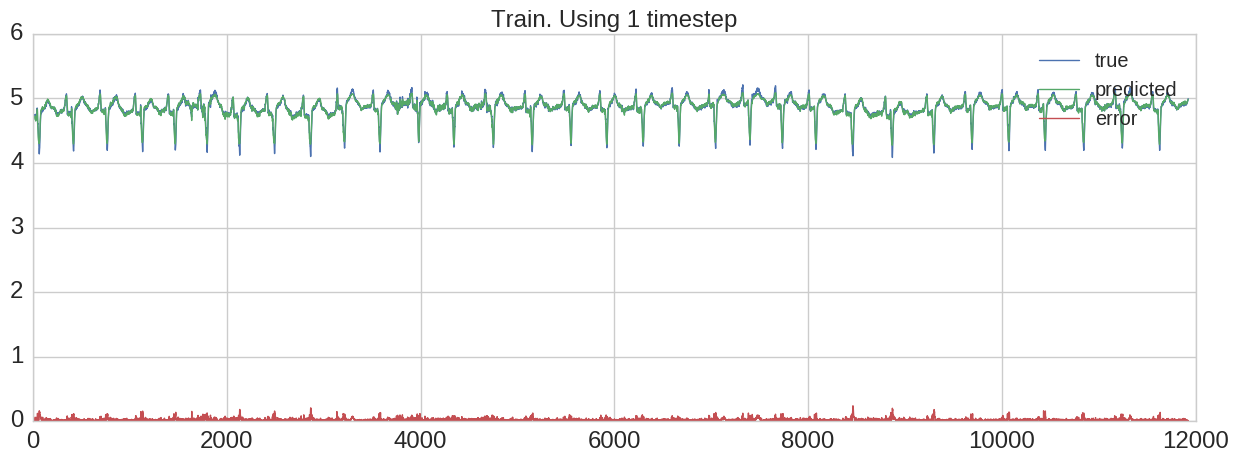

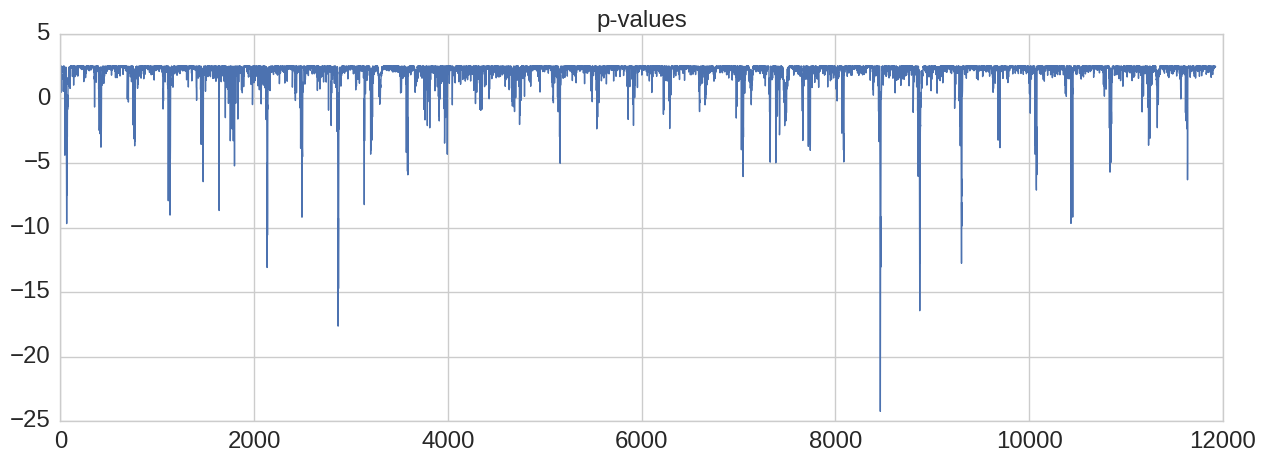

In [21]:
#error vectors
train_errors =  train_true -train_predictions
print np.shape(train_errors)
mean = np.mean(train_errors)
std = np.std(train_errors)
print mean
print std
p_values= norm(loc=mean, scale=std).logpdf(train_errors)

plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions,label='predicted')
plt.plot(abs(train_true - train_predictions),label='error')
plt.title("Train. Using 1 timestep")
plt.legend()


plt.figure(figsize=(15,5))
plt.plot(p_values)
plt.title("p-values")
plt.show()


In [22]:
v2_errors =  v2_true -v2_predictions
v2_p_values= norm(loc=mean, scale=std).logpdf(v2_errors)

test_errors =  test_true - test_predictions
test_p_values= norm(loc=mean, scale=std).logpdf(test_errors)




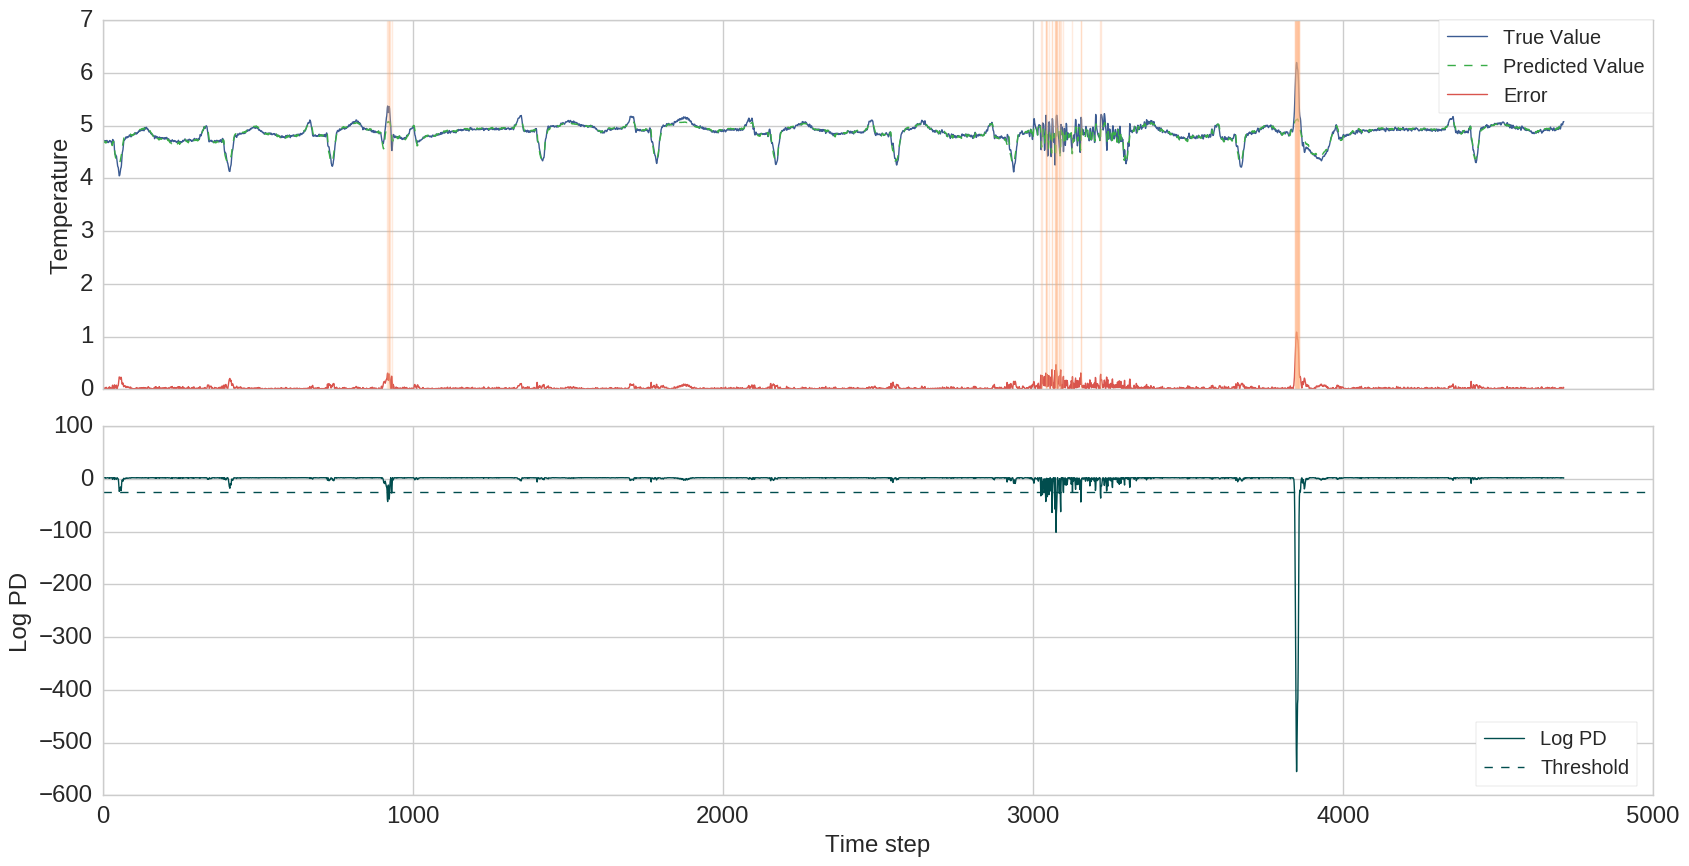

In [32]:
threshold_v2 = -25
v2_below_threshold = np.where(v2_p_values <= threshold_v2)

f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.1)

ax1 = plt.subplot(211)
ax1.plot(v2_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(v2_predictions,ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(v2_true - v2_predictions),label='Error',color=sns.xkcd_rgb["pale red"])
for column in v2_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["peach"],alpha=.25)
    
v2_true_anomalies = np.where(v2_labels[:,0]==1)

for row in v2_true_anomalies:
    ax1.plot(row, v2_true[row], 'r.', markersize=20.0)
plt.ylabel("Temperature")
ax1.legend(bbox_to_anchor=(1,1),borderaxespad=0.,frameon=True)
#plt.title("Validation2. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(v2_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
#plt.title("Validation2 p-values")
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"],)
ax2.legend(bbox_to_anchor=(.99, 0.2), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()

pp = PdfPages(data_folder+'/ECG_v2.pdf')
pp.savefig(f)
pp.close()

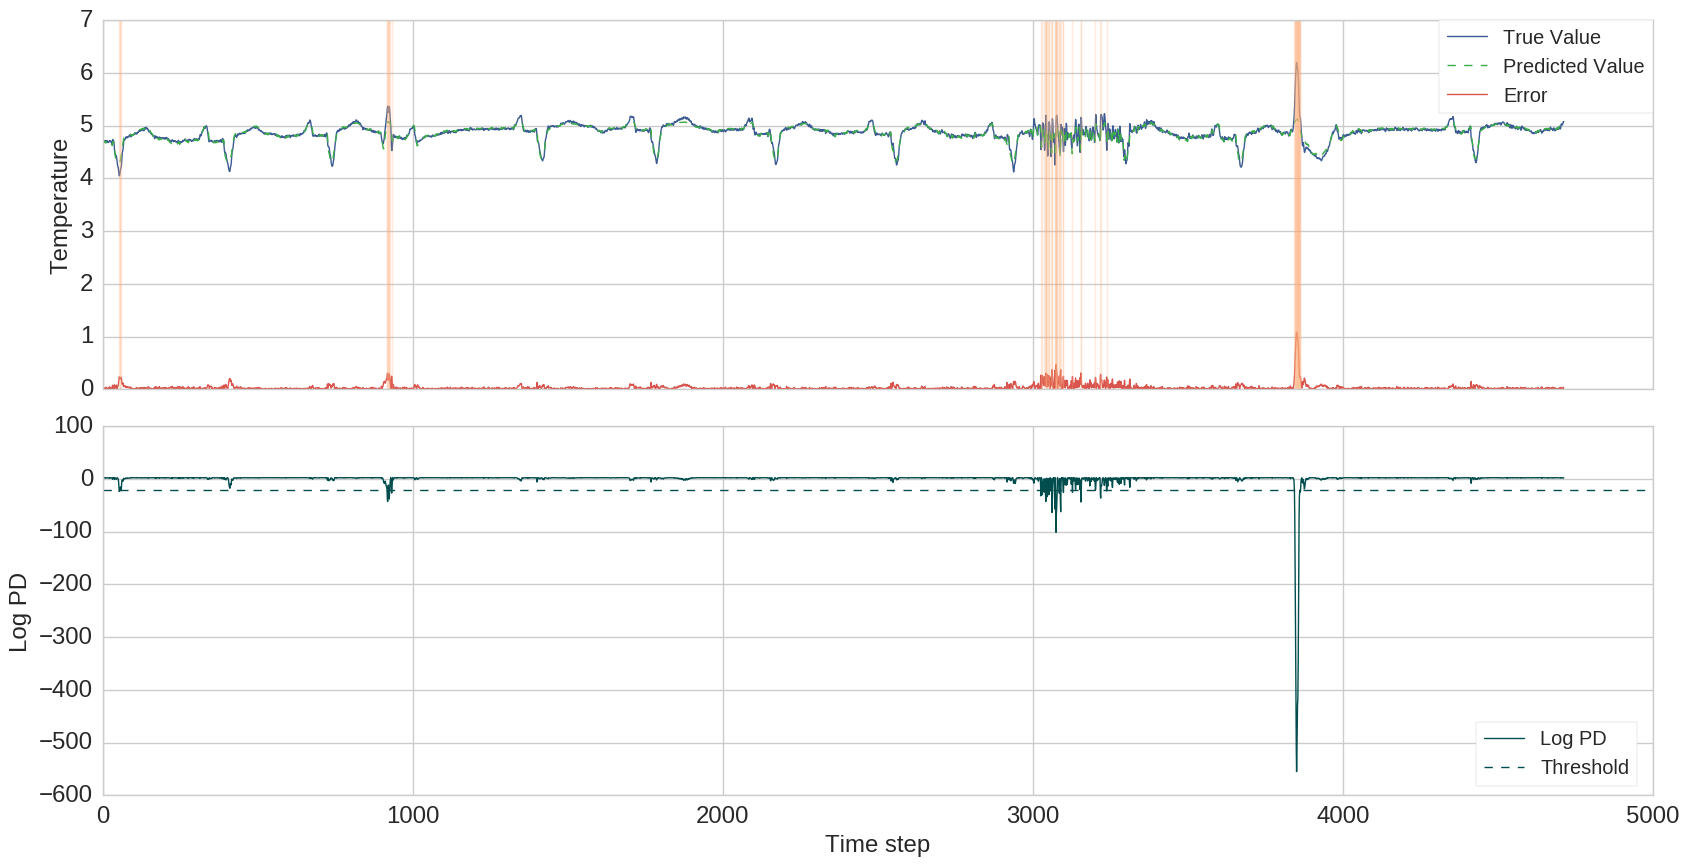

In [28]:

test_below_threshold = np.where(test_p_values <= threshold_v2)

f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.1)

ax1 = plt.subplot(211)
ax1.plot(test_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(test_predictions,ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(test_true - test_predictions),label='Error',color=sns.xkcd_rgb["pale red"])
for column in test_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["peach"],alpha=.25)
    
test_true_anomalies = np.where(test_labels[:,0]==1)

for row in test_true_anomalies:
    ax1.plot(row, test_true[row], 'r.', markersize=20.0)
plt.ylabel("Temperature")
ax1.legend(bbox_to_anchor=(1,1),borderaxespad=0.,frameon=True)
#plt.title("Validation2. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
#plt.title("Validation2 p-values")
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"],)
ax2.legend(bbox_to_anchor=(.99, 0.2), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()

pp = PdfPages(data_folder+'/machine_temp_test.pdf')
pp.savefig(f)
pp.close()